# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [14]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_index = random.randint(10, len(self.cards) - 10)  # Random placement
        self.shuffle()
        self.shown_cards = []
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
        print("Deck shuffled!")
    
    def draw_card(self):
        if not self.cards:
            print("Deck is empty! Reshuffling...")
            self.cards = self._generate_deck()
            self.shuffle()
        
        drawn_card = self.cards.pop()
        
        if len(self.cards) == self.plastic_card_index:
            print("Plastic card reached! Reshuffling deck after this round.")
            self.shuffle()
        
        return drawn_card
    
    def add_shown_card(self, card):
        self.shown_cards.append(card)
    
    def __len__(self):
        return len(self.cards)

In [4]:
# Example usage
deck = Deck()
deck.draw_card()  # Draw a card

Deck shuffled!


3 of Spades

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [5]:
class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        pass

    def clear(self):
        pass

    def get_value(self):
        return 0
    
    def __repr__(self):
        return f"Hand: {', '.join(map(str, self.cards))} (Value: {self.get_value()})"

class Player:
    def __init__(self, name, bank = 1000):
        self.name = name
        self.hand = Hand()
        self.bank = bank
        self.current_bet = 0
    
    def draw(self, deck):
        return None
    
    def bet(self, money = 100):
        return money
    
    def addMoney(self, money):
        pass
    
    def __repr__(self):
        return f"{self.name}: {self.hand}"

class Dealer(Player):
    def __init__(self):
        super().__init__("Mr. Dealer")
    
    def play(self, deck):
        pass

class DealerPlayer(Player):
    def __init__(self, name):
        super().__init__(name)

    def play(self, deck):
        pass

class HumanPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
    
    def play(self, deck):
        pass

class BlackjackGame:
    def __init__(self, num_decks=6, max_rounds = 50):
        self.max_rounds =  max_rounds
        self.deck = Deck(num_decks)

    
    def deal_initial_cards(self):
        pass
    
    def show_hands(self):
        pass

    def determine_winner(self):
        pass
    
    def play(self):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [6]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_index = random.randint(10, len(self.cards) - 10)  # Random placement
        self.shuffle()
        self.shown_cards = []
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
        print("Deck shuffled!")
    
    def draw_card(self):
        if not self.cards:
            print("Deck is empty! Reshuffling...")
            self.cards = self._generate_deck()
            self.shuffle()
        
        drawn_card = self.cards.pop()
        
        if len(self.cards) == self.plastic_card_index:
            print("Plastic card reached! Reshuffling deck after this round.")
            self.shuffle()
        
        return drawn_card
    
    def add_shown_card(self, card):
        self.shown_cards.append(card)
    
    def __len__(self):
        return len(self.cards)

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)

    def clear(self):
        self.cards = []

    def get_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value
    
    def __repr__(self):
        return f"Hand: {', '.join(map(str, self.cards))} (Value: {self.get_value()})"

class Player:
    def __init__(self, name, bank = 1000):
        self.name = name
        self.hand = Hand()
        self.bank = bank
        self.current_bet = 0
    
    def draw(self, deck):
        card = deck.draw_card()
        self.hand.add_card(card)
        return card
    
    def bet(self, money = 100):
        if self.bank == 0:
            self.current_bet = 0
            return 0
        
        self.current_bet = money
        self.bank -= money
        return money
    
    def addMoney(self, money):
        self.bank += money
    
    def __repr__(self):
        return f"{self.name}: {self.hand}"

class Dealer(Player):
    def __init__(self):
        super().__init__("Mr. Dealer")
    
    def play(self, deck):
        while self.hand.get_value() < 17:
            drawn_card = self.draw(deck)
            deck.add_shown_card(drawn_card)

            if self.hand.get_value() > 21:
                print(f"{self.name} busted with {self.hand}!")
                break
            else:
                print(f"{self.name} stands with {self.hand}")

class DealerPlayer(Player):
    def __init__(self, name):
        super().__init__(name)

    def play(self, deck):
        while True:
            print(self)
            if self.hand.get_value() < 17:
                drawn_card = self.draw(deck)
                deck.add_shown_card(drawn_card)

                if self.hand.get_value() > 21:
                    print(f"{self.name} busted with {self.hand}!")
                    break
            else:
                print(f"{self.name} stands with {self.hand}")
                break

class HumanPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
    
    def play(self, deck):
        while True:
            print(self)
            move = input("Do you want to (h)it or (s)tand? ").lower()
            if move == 'h':
                drawn_card = self.draw(deck)
                deck.add_shown_card(drawn_card)

                if self.hand.get_value() > 21:
                    print(f"{self.name} busted with {self.hand}!")
                    break
            elif move == 's':
                print(f"{self.name} stands with {self.hand}")
                break
            else:
                print("Invalid input. Please enter 'h' or 's'.")

class BlackjackGame:
    def __init__(self, players, num_decks=6, max_rounds = 50):
        self.max_rounds =  max_rounds
        self.deck = Deck(num_decks)
        self.players = players

        self.dealer = Dealer()
        self.current_round = 1
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                drawn_card = player.draw(self.deck)
                self.deck.add_shown_card(drawn_card)
            self.dealer.draw(self.deck)
        
        self.deck.add_shown_card(self.dealer.hand.cards[0])
    
    def show_hands(self):
        for player in self.players:
            print(player)
        print(f"Dealer: {self.dealer.hand.cards[0]} and [Hidden]")

    def _bet_all(self):
        for player in self.players:
            player.bet()

    def _setup_new_round(self):
        self.deck.shown_cards.clear()  # clear shown cards for next round

        self.dealer.hand.clear()
        for player in self.players: # remove player with empty bank
            if player.bank == 0:
                self.players.remove(player)

            player.hand.clear()

    def determine_winner(self):
        dealer_value = self.dealer.hand.get_value()
        print(f"Dealer's final hand: {self.dealer}")

        

        for player in self.players:
            player_value = player.hand.get_value()
            if player_value > 21:
                print(f"{player.name} busted!")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
                player.addMoney(player.current_bet*2)
            elif player_value < dealer_value:
                print(f"Dealer wins against {player.name}.")
            else:
                print(f"{player.name} and Dealer push (tie).")
                player.addMoney(player.current_bet)
    
    def play(self):
        while self.current_round <= self.max_rounds:
            if len(self.players) == 0: #check for zero players
                print("No players remaining to continue the game!")
                break

            self._bet_all()
            self.deal_initial_cards()
            self.show_hands()

            print("Starting Round", self.current_round)
            for player in self.players:
                player.play(self.deck)
            self.dealer.play(self.deck)
            self.determine_winner()

            self._setup_new_round()
            
            self.current_round += 1

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [7]:
players = [DealerPlayer(f"Player {i+1}") for i in range(2)]

game = BlackjackGame(players, max_rounds=3)
game.play()

Deck shuffled!
Player 1: Hand: 2 of Spades, 6 of Diamonds (Value: 8)
Player 2: Hand: A of Diamonds, K of Spades (Value: 21)
Dealer: 7 of Spades and [Hidden]
Starting Round 1
Player 1: Hand: 2 of Spades, 6 of Diamonds (Value: 8)
Player 1: Hand: 2 of Spades, 6 of Diamonds, 4 of Hearts (Value: 12)
Player 1: Hand: 2 of Spades, 6 of Diamonds, 4 of Hearts, 4 of Diamonds (Value: 16)
Player 1 busted with Hand: 2 of Spades, 6 of Diamonds, 4 of Hearts, 4 of Diamonds, 8 of Hearts (Value: 24)!
Player 2: Hand: A of Diamonds, K of Spades (Value: 21)
Player 2 stands with Hand: A of Diamonds, K of Spades (Value: 21)
Dealer's final hand: Mr. Dealer: Hand: 7 of Spades, J of Hearts (Value: 17)
Player 1 busted!
Player 2 wins!
Player 1: Hand: 4 of Hearts, 10 of Clubs (Value: 14)
Player 2: Hand: 2 of Diamonds, 3 of Diamonds (Value: 5)
Dealer: Q of Hearts and [Hidden]
Starting Round 2
Player 1: Hand: 4 of Hearts, 10 of Clubs (Value: 14)
Player 1: Hand: 4 of Hearts, 10 of Clubs, A of Clubs (Value: 15)
Player 

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [8]:
class StrategicPlayer(Player):
    def __init__(self, name, threshold=0):
        super().__init__(name)
        self.threshold = threshold

    def _getMove(self, shown_cards):
        running_count = 0
        for card in shown_cards:
            rank = card.rank
            if rank in ['2', '3', '4', '5', '6']:
                running_count+=1
            elif rank in ['7', '8', '9']:
                pass
            else:
                running_count -=1

        if running_count < self.threshold:
            return 'h'
        else:
            return 's'
    
    def play(self, deck):
        while True:
            print(self)
            move = self._getMove(deck.shown_cards)
            if move == 'h':
                drawn_card = self.draw(deck)
                deck.add_shown_card(drawn_card)

                if self.hand.get_value() > 21:
                    print(f"{self.name} busted with {self.hand}!")
                    break
            elif move == 's':
                print(f"{self.name} stands with {self.hand}")
                break

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [9]:
# verbose/quiet mode

import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_index = random.randint(10, len(self.cards) - 10)  # Random placement
        self.shuffle()
        self.shown_cards = []
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if not self.cards:
            self.cards = self._generate_deck()
            self.shuffle()
        
        drawn_card = self.cards.pop()
        
        if len(self.cards) == self.plastic_card_index:
            self.shuffle()
        
        return drawn_card
    
    def add_shown_card(self, card):
        self.shown_cards.append(card)
    
    def __len__(self):
        return len(self.cards)

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)

    def clear(self):
        self.cards = []

    def get_value(self):
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value
    
    def __repr__(self):
        return f"Hand: {', '.join(map(str, self.cards))} (Value: {self.get_value()})"

class Player:
    def __init__(self, name, bank = 1000):
        self.name = name
        self.hand = Hand()
        self.bank = bank
        self.current_bet = 0
    
    def draw(self, deck):
        card = deck.draw_card()
        self.hand.add_card(card)
        return card
    
    def bet(self, money = 100):
        if self.bank == 0:
            self.current_bet = 0
            return 0
        
        self.current_bet = money
        self.bank -= money
        return money
    
    def addMoney(self, money):
        self.bank += money
    
    def __repr__(self):
        return f"{self.name}: {self.hand}"

class Dealer(Player):
    def __init__(self):
        super().__init__("Mr. Dealer")
    
    def play(self, deck):
        while self.hand.get_value() < 17:
            drawn_card = self.draw(deck)
            deck.add_shown_card(drawn_card)

            if self.hand.get_value() > 21:
                break
            else:
                pass

class DealerPlayer(Player):
    def __init__(self, name):
        super().__init__(name)

    def play(self, deck):
        while True:
            if self.hand.get_value() < 17:
                drawn_card = self.draw(deck)
                deck.add_shown_card(drawn_card)

                if self.hand.get_value() > 21:
                    break
            else:
                break

class StrategicPlayer(Player):
    def __init__(self, name, threshold=0):
        super().__init__(name)
        self.threshold = threshold

    def _getMove(self, shown_cards):
        running_count = 0
        for card in shown_cards:
            rank = card.rank
            if rank in ['2', '3', '4', '5', '6']:
                running_count+=1
            elif rank in ['7', '8', '9']:
                pass
            else:
                running_count -=1

        if running_count < self.threshold:
            return 'h'
        else:
            return 's'
    
    def play(self, deck):
        while True:
            move = self._getMove(deck.shown_cards)
            if move == 'h':
                drawn_card = self.draw(deck)
                deck.add_shown_card(drawn_card)

                if self.hand.get_value() > 21:
                    break
            elif move == 's':
                break

class BlackjackGame:
    def __init__(self, players, num_decks=6, max_rounds = 50):
        self.max_rounds =  max_rounds
        self.deck = Deck(num_decks)
        self.players = players

        self.dealer = Dealer()
        self.current_round = 1
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                drawn_card = player.draw(self.deck)
                self.deck.add_shown_card(drawn_card)
            self.dealer.draw(self.deck)
        
        self.deck.add_shown_card(self.dealer.hand.cards[0])

    def _bet_all(self):
        for player in self.players:
            player.bet()

    def _setup_new_round(self):
        self.deck.shown_cards.clear()  # clear shown cards for next round

        self.dealer.hand.clear()
        for player in self.players: # remove player with empty bank
            if player.bank == 0:
                self.players.remove(player)

            player.hand.clear()

    def determine_winner(self):
        dealer_value = self.dealer.hand.get_value()

        for player in self.players:
            player_value = player.hand.get_value()
            if player_value > 21:
                pass
                # print(f"{player.name} busted!")
            elif dealer_value > 21:
                pass
                # print("Dealer busted!")
            elif player_value > dealer_value:
                # print(f"{player.name} wins!")
                player.addMoney(player.current_bet*2)
            elif player_value < dealer_value:
                pass
                # print(f"Dealer wins against {player.name}.")
            else:
                player.addMoney(player.current_bet)
                
    def has_won(self, player):
        dealer_value = self.dealer.hand.get_value()
        player_value = player.hand.get_value()
        if player_value <= 21 and player_value > dealer_value:
            return True
        else:
            return False
                
    
    def play(self):
        winning_list = {}

        while self.current_round <= self.max_rounds:
            self._setup_new_round()
            
            if not any(isinstance(player, StrategicPlayer) for player in players):
                # print("No StrategicPlayer left. Exiting")
                break  # Exit loop if no StrategicPlayer is found


            if len(self.players) == 0: #check for zero players
                break

            self._bet_all()
            self.deal_initial_cards()

            for player in self.players:
                player.play(self.deck)
            self.dealer.play(self.deck)
            
            self.determine_winner()

            for player in self.players: 
                if self.has_won(player):
                    winning_list[player.name] = winning_list.get(player.name, 0) + 1
            
            
            self.current_round += 1

        return winning_list

In [10]:
strategic_player = StrategicPlayer("Stratetic Man", 0)
dealer_players = [DealerPlayer(f"Player {i+1}") for i in range(3)]
dealer_players.append(strategic_player)

players = dealer_players
game = BlackjackGame(players, max_rounds=50)
game.play()

{'Player 1': 6, 'Player 3': 2, 'Player 2': 4}

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Deck shuffled!
Plastic card reached! Reshuffling deck after this round.
Deck shuffled!
Deck shuffled!
Plastic card reached! 

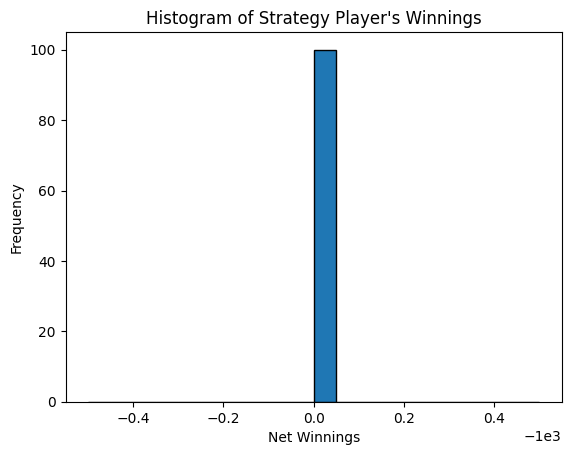

Average Winnings: -1000.0
Standard Deviation: 0.0
Probability of Net Winning: 0.0
Probability of Net Losing: 1.0


In [15]:
import numpy as np

import matplotlib.pyplot as plt

# Run 100 games of 50 rounds
winnings = []
for _ in range(100):
    # Reset players and game
    strategic_player.bank = 1000
    for player in dealer_players:
        player.bank = 1000
    players = dealer_players + [strategic_player]
    game = BlackjackGame(players, max_rounds=50)
    game.play()
    winnings.append(strategic_player.bank - 1000)  # Net winnings

# Histogram of winnings
plt.hist(winnings, bins=20, edgecolor='black')
plt.title("Histogram of Strategy Player's Winnings")
plt.xlabel("Net Winnings")
plt.ylabel("Frequency")
plt.show()

# Calculate statistics
average_winnings = np.mean(winnings)
std_dev_winnings = np.std(winnings)
probability_net_winning = sum(1 for w in winnings if w > 0) / len(winnings)
probability_net_loss = sum(1 for w in winnings if w < 0) / len(winnings)

print(f"Average Winnings: {average_winnings}")
print(f"Standard Deviation: {std_dev_winnings}")
print(f"Probability of Net Winning: {probability_net_winning}")
print(f"Probability of Net Losing: {probability_net_loss}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Threshold: -5, Average Winnings: -1000.0
Threshold: -2, Average Winnings: -1000.0
Threshold: 0, Average Winnings: -1000.0
Threshold: 2, Average Winnings: -1000.0
Threshold: 5, Average Winnings: -1000.0


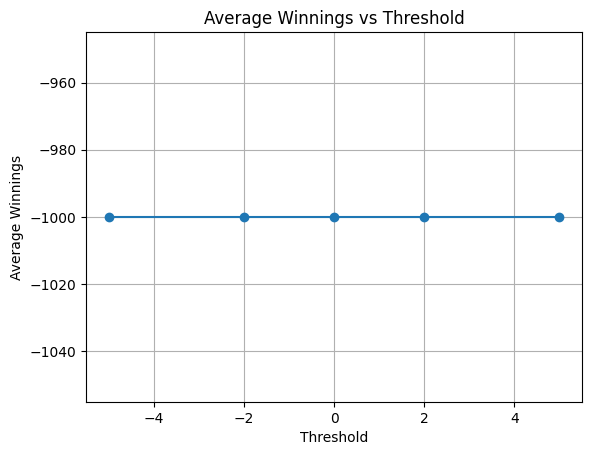

In [12]:
threshold_values = [-5, -2, 0, 2, 5]
threshold_results = {}

for threshold in threshold_values:
    # Update the strategic player's threshold
    strategic_player.threshold = threshold
    
    # Run 100 games of 50 rounds for the current threshold
    winnings = []
    for _ in range(100):
        # Reset players and game
        strategic_player.bank = 1000
        for player in dealer_players:
            player.bank = 1000
        players = dealer_players + [strategic_player]
        game = BlackjackGame(players, max_rounds=50)
        game.play()
        winnings.append(strategic_player.bank - 1000)  # Net winnings
    
    # Store the results for the current threshold
    average_winnings = np.mean(winnings)
    threshold_results[threshold] = average_winnings

# Print the results
for threshold, avg_winnings in threshold_results.items():
    print(f"Threshold: {threshold}, Average Winnings: {avg_winnings}")

# Plot the results
plt.plot(threshold_values, list(threshold_results.values()), marker='o')
plt.title("Average Winnings vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Average Winnings")
plt.grid()
plt.show()

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [13]:
# A cautious player who only hits if their hand value is below a given threshold
class CautiousPlayer(Player):
    def __init__(self, name, safe_threshold=16):
        super().__init__(name)
        self.safe_threshold = safe_threshold

    def _getMove(self, shown_cards):
        if self.hand.get_value() < self.safe_threshold:
            return 'h'
        return 's'

    def play(self, deck):
        print(self)
        move = self._getMove(deck.shown_cards)
        
        if move == 'h':
            drawn_card = self.draw(deck)
            deck.add_shown_card(drawn_card)

            if self.hand.get_value() > 21:
                print(f"{self.name} busted with {self.hand}!")
        elif move == 's':
            print(f"{self.name} stands with {self.hand}")